## PROJECT

## Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import plotly
import matplotlib.pyplot as plt
plotly.offline.init_notebook_mode(connected=True)
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import Scatter, Figure, Layout
from plotly.graph_objs import *
plotly.tools.set_credentials_file(username='Shahbaz0111', api_key='EkmPvnKrZSsK9wycPPbE')

In [2]:
import plotly.offline as offline

In [3]:
%matplotlib inline

In [4]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

## Read Files

In [5]:
df = pd.read_csv('Complete_Months_Data.csv' , encoding='latin1' , index_col=0)

D:\Anaconda\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [6]:
df.shape , df.columns

((1365678, 21),
 Index(['DATE_AND_TIME', 'new_date', 'new_time', 'CHANNEL', 'AGENT_TYPE',
        'TRANSACTION_TYPE', 'AMOUNT', 'FED', 'FEE', 'COMMISION', 'WHT', 'CITY',
        'STATUS', 'Total_deduction', 'Revnue', 'date', 'Month', 'WeekDay_Name',
        'Hours', 'wom', 'day_of_week'],
       dtype='object'))

In [7]:
df = (df[(df.CHANNEL == 'USSD') & (df.TRANSACTION_TYPE== 'OTC Send Money')])

In [8]:
df = df.reset_index(drop=True)

In [9]:
df

,DATE_AND_TIME,new_date,new_time,CHANNEL,AGENT_TYPE,TRANSACTION_TYPE,AMOUNT,FED,FEE,COMMISION,...,CITY,STATUS,Total_deduction,Revnue,date,Month,WeekDay_Name,Hours,wom,day_of_week
0,2017-04-01 00:06:31,2017-04-01,00:06:31,USSD,ROLE_AGENT_CHILD,OTC Send Money,2000.0,13.80,106.19,25.0,...,Karachi,FULLYPROCESSED,148.74,1851.26,1,4,Saturday,0,0,5
1,2017-04-01 00:07:38,2017-04-01,00:07:38,USSD,ROLE_AGENT_CHILD,OTC Send Money,4000.0,20.71,159.29,37.5,...,Karachi,FULLYPROCESSED,223.13,3776.87,1,4,Saturday,0,0,5
2,2017-04-01 06:37:11,2017-04-01,06:37:11,USSD,ROLE_AGENT_CHILD,OTC Send Money,1000.0,8.28,51.72,12.5,...,Lahore,FULLYPROCESSED,74.38,925.62,1,4,Saturday,6,0,5
3,2017-04-01 06:41:38,2017-04-01,06:41:38,USSD,ROLE_AGENT_CHILD,OTC Send Money,14000.0,62.07,387.93,100.0,...,Noshki,FULLYPROCESSED,564.40,13435.60,1,4,Saturday,6,0,5
4,2017-04-01 06:45:19,2017-04-01,06:45:19,USSD,ROLE_AGENT_CHILD,OTC Send Money,1000.0,8.28,51.72,12.5,...,Lakki-Marwat,FULLYPROCESSED,74.38,925.62,1,4,Saturday,6,0,5
5,2017-04-01 07:03:45,2017-04-01,07:03:45,USSD,ROLE_AGENT_CHILD,OTC Send Money,10000.0,48.28,301.72,75.0,...,Noshki,FULLYPROCESSED,435.80,9564.20,1,4,Saturday,7,0,5
6,2017-04-01 07:05:03,2017-04-01,07:05:03,USSD,ROLE_AGENT_CHILD,OTC Send Money,14000.0,62.07,387.93,100.0,...,Chakwal,FULLYPROCESSED,565.00,13435.00,1,4,Saturday,7,0,5
7,2017-04-01 07:08:52,2017-04-01,07:08:52,USSD,ROLE_AGENT_CHILD,OTC Send Money,15000.0,62.07,387.93,100.0,...,Noshki,FULLYPROCESSED,564.40,14435.60,1,4,Saturday,7,0,5
8,2017-04-01 07:12:26,2017-04-01,07:12:26,USSD,ROLE_AGENT_CHILD,OTC Send Money,13000.0,55.17,344.83,87.5,...,Noshki,FULLYPROCESSED,500.10,12499.90,1,4,Saturday,7,0,5
9,2017-04-01 07:15:25,2017-04-01,07:15:25,USSD,ROLE_AGENT_CHILD,OTC Send Money,5000.0,33.10,206.90,50.0,...,Noshki,FULLYPROCESSED,297.20,4702.80,1,4,Saturday,7,0,5


In [10]:
df1 = df[['Month', 'date','Hours','Revnue']]

In [11]:
df1 = pd.DataFrame({'sum_inflow' : df1.groupby( ["Month", "date","Hours"] )["Revnue"].sum()}).reset_index()

In [24]:
#df.groupby(["Month", "date","Hours"])["Revnue"].transform('count')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [12]:
df1

,Month,date,Hours,sum_inflow
0,4,1,0,5628.13
1,4,1,6,15286.84
2,4,1,7,83729.32
3,4,1,8,360629.24
4,4,1,9,660620.06
5,4,1,10,1536685.57
6,4,1,11,2012399.82
7,4,1,12,1946536.56
8,4,1,13,1275144.43
9,4,1,14,1400571.49


In [13]:
df1.describe().astype(int)

,Month,date,Hours,sum_inflow
count,1503,1503,1503,1503
mean,5,14,12,610875
std,0,8,6,512182
min,4,1,0,425
25%,5,7,8,98550
50%,5,15,13,590696
75%,6,21,18,998255
max,6,30,23,2897731


In [14]:
Avg_inflow = df1.sum_inflow.mean()

In [15]:
df1['Avg_inflow - Sum_inflow'] = df1.sum_inflow - Avg_inflow

In [16]:
df1

,Month,date,Hours,sum_inflow,Avg_inflow - Sum_inflow
0,4,1,0,5628.13,-6.052470e+05
1,4,1,6,15286.84,-5.955883e+05
2,4,1,7,83729.32,-5.271458e+05
3,4,1,8,360629.24,-2.502459e+05
4,4,1,9,660620.06,4.974491e+04
5,4,1,10,1536685.57,9.258104e+05
6,4,1,11,2012399.82,1.401525e+06
7,4,1,12,1946536.56,1.335661e+06
8,4,1,13,1275144.43,6.642693e+05
9,4,1,14,1400571.49,7.896963e+05


In [17]:
conditions = [
    (df1['Avg_inflow - Sum_inflow'].values >= 0),
    (df1['Avg_inflow - Sum_inflow'].values < 0)
    ]
choices = [1 , 0 ]
df1['Earning1'] = np.select(conditions, choices, default=0)                         

In [18]:
df1['Earning1'].value_counts().to_frame()

,Earning1
0,764
1,739


In [41]:
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA 
from sklearn.cross_validation  import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score

In [20]:
df1

,Month,date,Hours,sum_inflow,Avg_inflow - Sum_inflow,Earning1
0,4,1,0,5628.13,-6.052470e+05,0
1,4,1,6,15286.84,-5.955883e+05,0
2,4,1,7,83729.32,-5.271458e+05,0
3,4,1,8,360629.24,-2.502459e+05,0
4,4,1,9,660620.06,4.974491e+04,1
5,4,1,10,1536685.57,9.258104e+05,1
6,4,1,11,2012399.82,1.401525e+06,1
7,4,1,12,1946536.56,1.335661e+06,1
8,4,1,13,1275144.43,6.642693e+05,1
9,4,1,14,1400571.49,7.896963e+05,1


## divide data into X and  Y.

In [21]:
x = df1.iloc[:, [0,1,2]].values

In [22]:
y = df1.iloc[:, 5].values

In [23]:
x , y 

(array([[ 4,  1,  0],
        [ 4,  1,  6],
        [ 4,  1,  7],
        ..., 
        [ 6, 30, 20],
        [ 6, 30, 21],
        [ 6, 30, 22]], dtype=int64), array([0, 0, 0, ..., 0, 0, 0]))

## Divide data based on testing and training. 

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=0)

In [25]:
from collections import Counter
Counter(y_train)

Counter({0: 511, 1: 491})

In [34]:
#Support vector regression
clf = svm.SVC()
#training
clf.fit(x_train,y_train)  


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
#prediction
prd=clf.predict(x_test)

In [38]:
#accuracy
clf.score(x_test, y_test)

0.87425149700598803

In [44]:
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(x_train,y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(x_train,y_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(x_train,y_train)
lin_svc = svm.LinearSVC(C=C).fit(x_train,y_train)

## Implement and classifier  based on simple linear regression.

In [19]:
from sklearn.linear_model import LinearRegression
simplelinearRegression = LinearRegression()
simplelinearRegression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
y_predict = simplelinearRegression.predict(x_test)

In [21]:
y_predict , y_test

(array([ 1957.75127147,  1522.39634851,  1905.45600146, ...,  2083.66120623,
         2178.09365729,  1873.97851777]),
 array([  185.4 ,   335.4 ,  1053.42, ...,  4644.4 ,  1699.42,  3073.4 ]))

In [28]:
print(y_predict[100:130])  
print(y_test[100:130]) 

[1527 2131 1606 1580 2209 1774 1968 2088 1527 1884 1522 1889 2094 1963 1963
 1522 2214 1957 1894 1517 1580 1475 2136 2340 1527 1805 2026 1443 1957 2183]
[2195 2895 4025 3408 1562 3008 1443 4255  467  425  195   91 1410  691  955
 2325 1353  195  195  415  522 1805 1105 4470 1095  355  456  225 1535  185]


In [24]:
y_predict = y_predict.astype(int) 

In [25]:
y_test =y_test.astype(int)

In [24]:
type(y_predict[0])

numpy.float64

In [26]:
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
Accuracy_Score = accuracy_score(y_test, y_predict)
Precision_Score = precision_score(y_test, y_predict,  average="macro")
Precision_Score1 = precision_score(y_test, y_predict,  average="micro")
Precision_Score2 = precision_score(y_test, y_predict,  average="weighted")
Recall_Score = recall_score(y_test, y_predict,  average="macro")
F1_Score = f1_score(y_test, y_predict,  average="macro")   

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



In [63]:
print(Accuracy_Score)
print(Precision_Score)
print(Recall_Score)
print(F1_Score)

0.000111110653866
9.90083250151e-06
7.42909918538e-05
1.13539431977e-05


In [66]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_predict)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [63]:
(sum(abs(y_predict - y_test))/ 94117 ) * 100 

7.1688005355036806

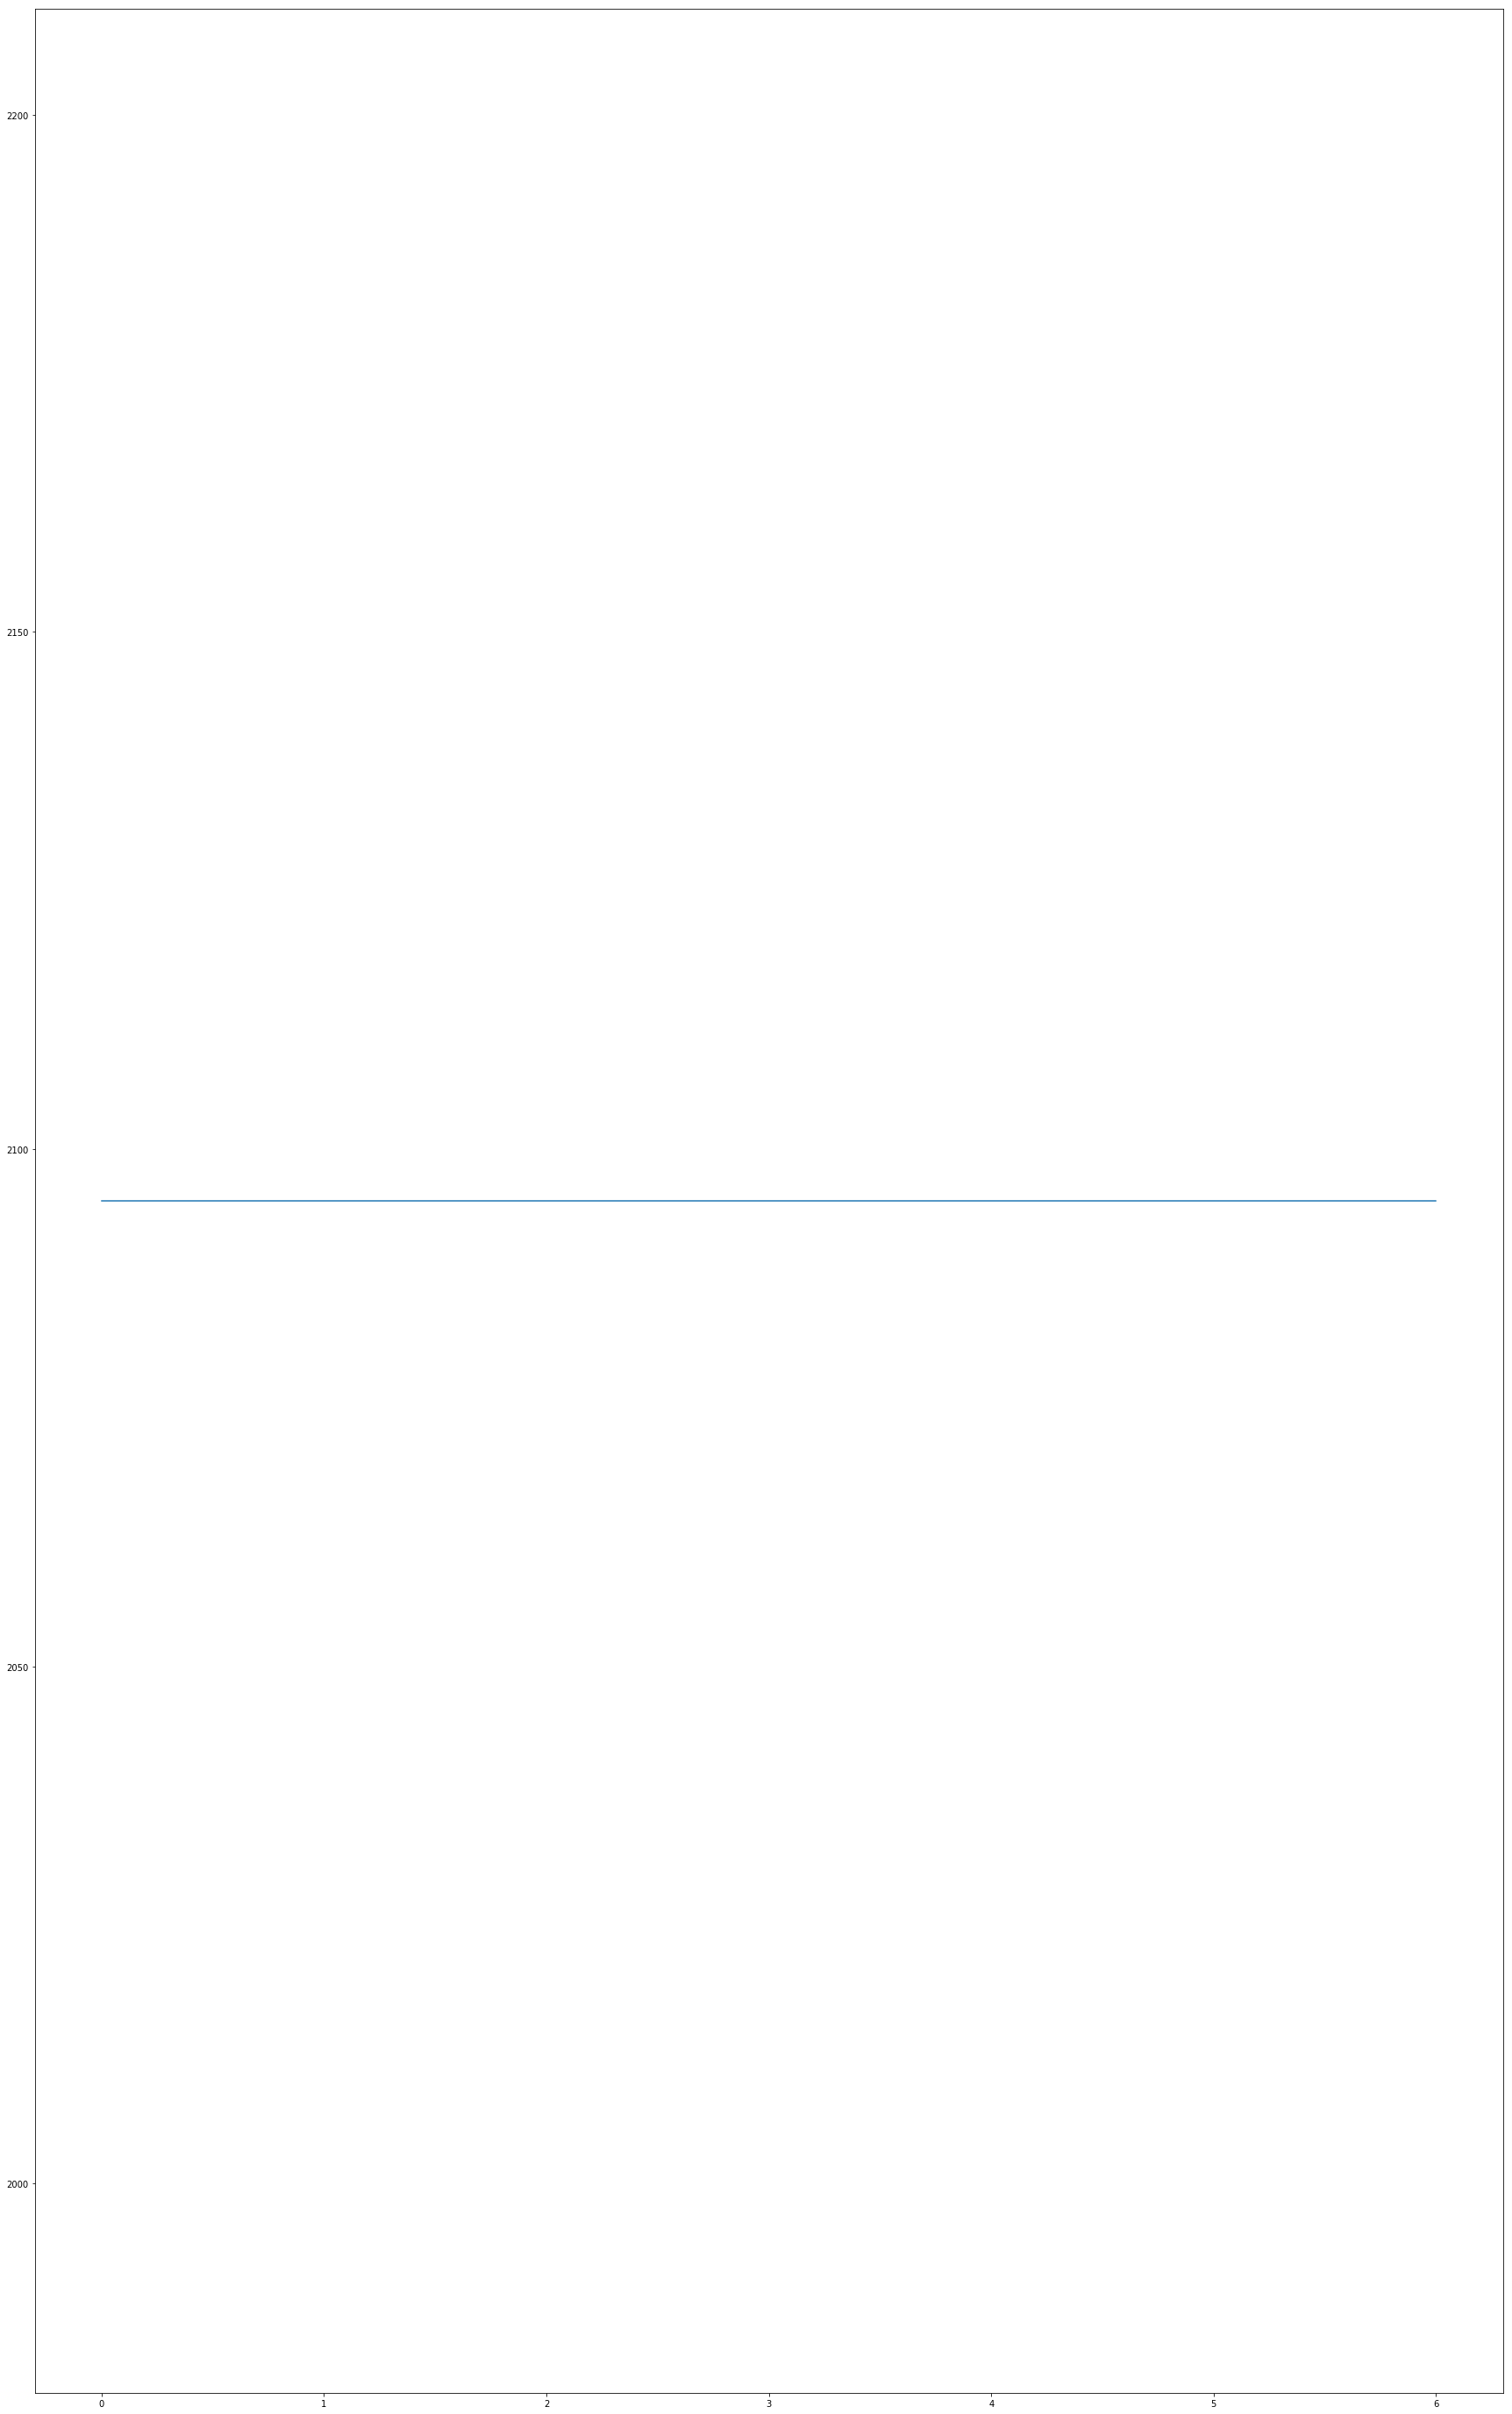

In [38]:
plt.figure(figsize=(30,50))
#plt.scatter(y_test,color='red')
plt.plot(y_predict)
plt.show()

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test, sample_weight=w )


NameError: name 'w' is not defined

In [ ]:
# Python program to display all the prime numbers within an interval

lower = 2
upper = 50

print("Prime numbers between",lower,"and",upper,"are:")

for num in range(lower,upper + 1):
  
   if num > 1:
       for i in range(2,num):
           if (num % i) == 0:
               break
       else:
           print(num)

In [ ]:
# Program to check Armstrong numbers in certain interval

lower = 100
upper = 2000

for num in range(lower, upper + 1):order = len(str(num))
    
  
   sum = 0

   # find the sum of the cube of each digit
   temp = num
   while temp > 0:
       digit = temp % 10
       sum += digit ** order
       temp //= 10

   if num == sum:
       print(num)

In [ ]:
# Python program to display the Fibonacci sequence up to n-th term using recursive functions

def recur_fibo(n):
  
   if n <= 1:
       return n
   else:
       return(recur_fibo(n-1) + recur_fibo(n-2))


nterms = 20



if nterms <= 0:
   print("Plese enter a positive integer")
else:
   print("Fibonacci sequence:")
   for i in range(nterms):
       print(recur_fibo(i))

In [ ]:
# Python program to check if the input number is prime or not

num = 407

# take input from the user
# num = int(input("Enter a number: "))

# prime numbers are greater than 1
if num > 1:
   # check for factors
   for i in range(2,num):
       if (num % i) == 0:
           print(num,"is not a prime number")
           print(i,"times",num//i,"is",num)
           break
   else:
       print(num,"is a prime number")
       
# if input number is less than
# or equal to 1, it is not prime
else:
   print(num,"is not a prime number")

In [67]:
ord('a'), chr(97)

(97, 'a')

In [78]:
n=int(input("Enter a number: "))
for j in range(1,n+1):
    a=[]
    for i in range(1,j+1):
        print(i,sep=" ",end=" ")
        if(i<j):
            print("+",sep=" ",end=" ")
        a.append(i)
    print("=",sum(a))
 
print()




Enter a number: 5
1 

TypeError: 'int' object is not callable

In [ ]:
n=int(input("Enter number of rows: "))
for i in range (n,0,-1):
    print((n-i) * ' ' + i * '*')

In [ ]:
n=int(input("Enter a number: "))
for i in range(0,n):
    for j in range(0,n):
        if(i==j):
            print("1",sep=" ",end=" ")
        else:
            print("0",sep=" ",end=" ")
    print()

In [85]:
import numpy as py 
import math as mh 
n=int(input("Enter a number: "))
for j in range(1,n+1):
    a=[]
    for i in range(1,j+1):
        print(i,sep=" ",end=" ")
        if(i<j):
            print("+",sep=" ",end=" ")
        a.append(i)
        A = sum(a)
    
 
print()

Enter a number: 5
1 

TypeError: 'int' object is not callable

In [ ]:
#number of character and number of string. 
string=input("Enter string:")
char=0
word=1
for i in string:
      char=char+1
      if(i==' '):
            word=word+1
print("Number of words in the string:")
print(word)
print("Number of characters in the string:")
print(char)

In [97]:
def check(string,ch):
      if not string:
        return 0
      elif string[0]==ch:
            return 1+check(string[1:],ch)
      else:
            return check(string[1:],ch)
string=input("Enter string:")
ch=input("Enter character to check:")
print("Count is:")
print(check(string,ch))

Enter string:shahbaz nawaz is the son of muhammad nawaz
Enter character to check:n
Count is:
3


In [98]:
a=[]
n= int(input("Enter the number of elements in list:"))
for x in range(0,n):
    element=input("Enter element" + str(x+1) + ":")
    a.append(element)
max1=len(a[0])
temp=a[0]
for i in a:
    if(len(i)>max1):
       max1=len(i)
       temp=i
print("The word with the longest length is:")
print(temp)

Enter the number of elements in list:10
Enter element1:shahbaz
Enter element2:hassan 
Enter element3:tariq
Enter element4:salama
Enter element5:amna
Enter element6:aaaaaaaaaaa
Enter element7:ddddddddddd
Enter element8:gggggggggggggggggg
Enter element9:hhhhhhhhhhhhhhhhhhh
Enter element10:ww
The word with the longest length is:
hhhhhhhhhhhhhhhhhhh


In [100]:
string=input("Enter string:")
count1=0
count2=0
for i in string:
      if(i.islower()):
            count1=count1+1
      elif(i.isupper()):
            count2=count2+1
print("The number of lowercase characters is:")
print(count1)
print("The number of uppercase characters is:")
print(count2)

Enter string:Shahbaz NawaZ
The number of lowercase characters is:
9
The number of uppercase characters is:
3


In [108]:
sentence = ' hello  apple'
print(sentence.replace(" ", ""))


helloapple


'helloshahbazapple'